# Stable Diffusion
https://en.wikipedia.org/wiki/Stable_Diffusion

### Stable Diffusion Huggingface
https://huggingface.co/spaces/stabilityai/stable-diffusion

### Waifu Diffusion Huggingface
https://huggingface.co/hakurei/waifu-diffusion

### Prompts guide
https://www.reddit.com/r/WaifuDiffusion/comments/xudcdp/prompts_guide_by_cdcruz/

In [ ]:
try:
    import diffusers
except:
    !pip install -q transformers
    !pip install -q accelerate
    !pip install -q diffusers
    import diffusers

import torch
import matplotlib.pyplot as plt
import numpy as np
import time

if torch.cuda.is_available():
    device_name = torch.device("cuda")
else:
    device_name = torch.device("cpu")

print("Using {}.".format(device_name))

In [ ]:
# Load diffuser pipeline.
def load_pipeline(model_dir, device_name):
    pipe = diffusers.StableDiffusionPipeline.from_pretrained(model_dir, torch_dtype = torch.float32)

    #pipe.scheduler = diffusers.EulerDiscreteScheduler.from_config(pipe.scheduler.config)
    pipe.scheduler = diffusers.EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

    pipe.safety_checker = lambda images, **kwargs: [images, [False] * len(images)]
    pipe = pipe.to(device_name)
    return pipe

#model_dir = "stabilityai/stable-diffusion-2"
model_dir = "hakurei/waifu-diffusion"

pipe = load_pipeline(model_dir, device_name)

In [9]:
# Run diffuser pipeline.
def run_pipe(prompt, negative_prompt = None, steps = 60, width = 512, height = 704, scale = 8.0, seed = 123, n_images = 1):
    gen = torch.Generator(device = device_name).manual_seed(seed)
    image_list = []
    with torch.autocast("cuda"): 
        for i in range(n_images): 
            image = pipe(prompt, height = height, width = width, num_inference_steps = steps, guidance_scale = scale,
                        negative_prompt = negative_prompt, generator = gen)
            image_list.append(image)
    return image_list


prompt_0 = "((masterpiece)),(best quality),(8k),(beautiful detailed face),photorealistic,"
prompt_0 += "(perfect anatomy),(1girl),solo,long hair,(white bikini),(large breasts),spreading legs,"
prompt_0 += "(pleasured expression),slim,thin waist,(mature woman),perfect face,(cleavage)"

#negative_prompt = "(worst quality),(low quality),medium quality,deleted,lowres,cartoon,3d,comic,(bad anatomy),bad hands,text,error,"
#negative_prompt += "(deformed),(blurry),missing fingers,extra digit,fewer digits,(disfigured),(poorly drawn face),mutation,mutated,extra limb,ugly,"
#negative_prompt += "poorly drawn hands,two heads,child,kid,gross,mutilated,disgusting,horrible,scary,evil,old,conjoined"

negative_prompt = """(worst quality),(low quality),medium quality,deleted,lowres,cartoon,3d,comic,
(bad anatomy),bad hands,text,error,(deformed),(blurry),missing fingers,extra digit,fewer digits,
(disfigured),(poorly drawn face),mutation,mutated,extra limb,ugly,poorly drawn hands,two heads,
child,kid,gross,mutilated,disgusting,horrible,scary,evil,old,conjoined"""

images_0 = run_pipe(prompt_0, negative_prompt, steps = 60, width = 512, height = 704, scale = 8.0, seed = 123, n_images = 1)

  0%|          | 0/60 [00:00<?, ?it/s]

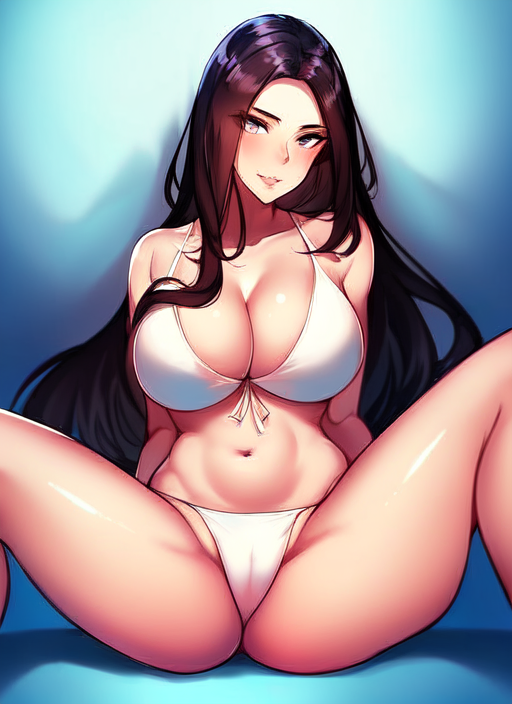

In [10]:
for i in range(len(images_0)):
    display(images_0[i].images[0])

In [7]:
prompt_4 = "((masterpiece)),(best quality),(8k),(beautiful detailed face),photorealistic,"
prompt_4 += "(perfect anatomy),(1girl),solo,long hair,white bikini,large breasts,seaside,"
prompt_4 += "(pleasured expression),slim,thin waist,mature woman,perfect face,(cleavage)"

images_4 = run_pipe(prompt_4, negative_prompt, steps = 60, width = 600, height = 800, scale = 8.0, seed = 435657658675412, n_images = 1)

  0%|          | 0/60 [00:00<?, ?it/s]

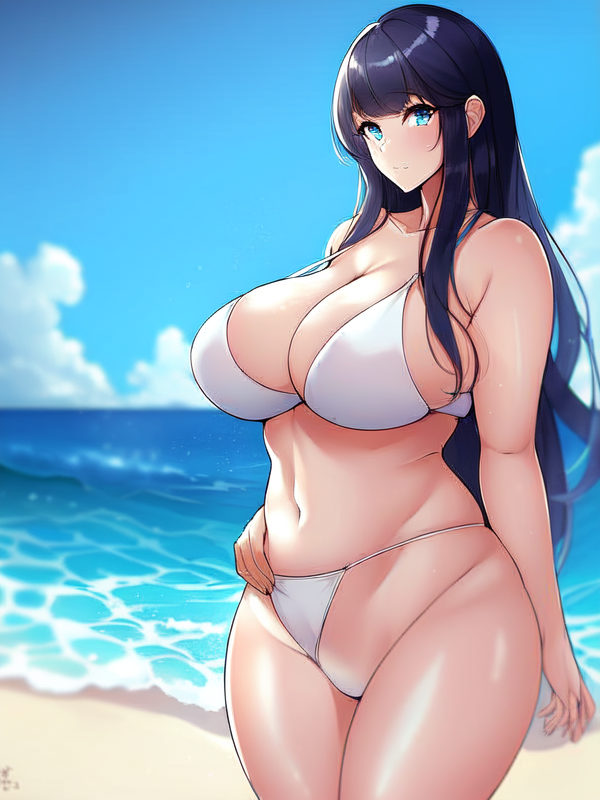

In [8]:
for i in range(len(images_4)):
    display(images_4[i].images[0])